In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [2]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [3]:
# load train and test dataset
def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = cifar10.load_data()
 # one hot encode target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY

In [4]:
# scale pixels
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

In [5]:
# define cnn model
def define_model():
    new_model = Sequential()
    
    model = tf.keras.applications.ResNet50(
        include_top=False,
        weights=None,
        input_tensor=None,
        input_shape=(32,32,3),
        pooling=None,
        classes=10,
       # classifier_activation="softmax",
    #    **kwargs
        )
    
    
    new_model.add(model)
    #3rd conv layer
    new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2, padding='same'))
    new_model.add(tf.keras.layers.Dropout(0.2))
    #4th conv layer
    new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2, padding='same'))
    new_model.add(tf.keras.layers.Dropout(0.2))
    #Flatten Layer
    new_model.add(tf.keras.layers.Flatten())

    new_model.add(tf.keras.layers.Dense(128))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.Dropout(0.2))
    #output Dense Layer
    new_model.add(tf.keras.layers.Dense(10))
    new_model.add(tf.keras.layers.Activation('softmax'))
    
    opt = SGD(lr=0.001, momentum=0.9)
    new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return new_model

In [6]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
    model_trained = history
    accuracy = model_trained.history['accuracy']
    val_accuracy = model_trained.history['val_accuracy']
    loss = model_trained.history['loss']
    val_loss = model_trained.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
    plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
    plt.title('Acurácia de treino e validação')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Perda no treino')
    plt.plot(epochs, val_loss, 'g', label='Perda na validação')
    plt.title('Perda na validação e treino')
    plt.legend()
    plt.show()

In [7]:
epochs = 100
verb = 1

In [8]:
trainX, trainY, testX, testY = load_dataset()
 # prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
 # define model
model = define_model()
 # create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 # prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
 # fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(testX, testY), verbose=verb)


Epoch 1/100


C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


781/781 [==============================] - 104s 124ms/step - loss: 2.1665 - accuracy: 0.2124 - val_loss: 1.8332 - val_accuracy: 0.3272
Epoch 2/100
781/781 [==============================] - 94s 120ms/step - loss: 1.8774 - accuracy: 0.3120 - val_loss: 1.6406 - val_accuracy: 0.4086
Epoch 3/100
781/781 [==============================] - 94s 120ms/step - loss: 1.7321 - accuracy: 0.3687 - val_loss: 1.5325 - val_accuracy: 0.4502
Epoch 4/100
781/781 [==============================] - 94s 120ms/step - loss: 1.6398 - accuracy: 0.4102 - val_loss: 1.4793 - val_accuracy: 0.4707
Epoch 5/100
781/781 [==============================] - 94s 121ms/step - loss: 1.5749 - accuracy: 0.4353 - val_loss: 1.4169 - val_accuracy: 0.4919
Epoch 6/100
781/781 [==============================] - 94s 121ms/step - loss: 1.5133 - accuracy: 0.4614 - val_loss: 1.3580 - val_accuracy: 0.5156
Epoch 7/100
781/781 [==============================] - 94s 121ms/step - loss: 1.4749 - accuracy: 0.4765 - val_loss: 1.3232 - val_accura

Epoch 57/100
781/781 [==============================] - 94s 120ms/step - loss: 0.6217 - accuracy: 0.7958 - val_loss: 0.8396 - val_accuracy: 0.7209
Epoch 58/100
781/781 [==============================] - 94s 120ms/step - loss: 0.6090 - accuracy: 0.7985 - val_loss: 0.7861 - val_accuracy: 0.7407
Epoch 59/100
781/781 [==============================] - 93s 119ms/step - loss: 0.6015 - accuracy: 0.8037 - val_loss: 0.8338 - val_accuracy: 0.7302
Epoch 60/100
781/781 [==============================] - 93s 119ms/step - loss: 0.6014 - accuracy: 0.8029 - val_loss: 0.8369 - val_accuracy: 0.7261
Epoch 61/100
781/781 [==============================] - 94s 120ms/step - loss: 0.5927 - accuracy: 0.8060 - val_loss: 0.8372 - val_accuracy: 0.7314
Epoch 62/100
781/781 [==============================] - 95s 121ms/step - loss: 0.5832 - accuracy: 0.8092 - val_loss: 0.7822 - val_accuracy: 0.7469
Epoch 63/100
781/781 [==============================] - 94s 120ms/step - loss: 0.5761 - accuracy: 0.8114 - val_loss: 0

In [9]:
 # evaluate model
_, acc = model.evaluate(testX, testY, verbose=verb)
print('Acurácia: %.3f' % (acc * 100.0))

313/313 [==============================] - 8s 24ms/step - loss: 0.7917 - accuracy: 0.7689
Acurácia: 76.890


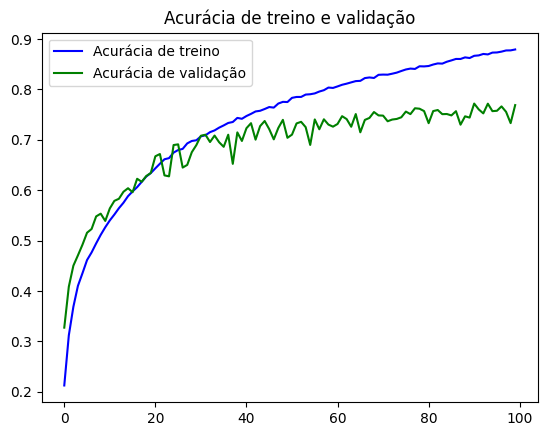

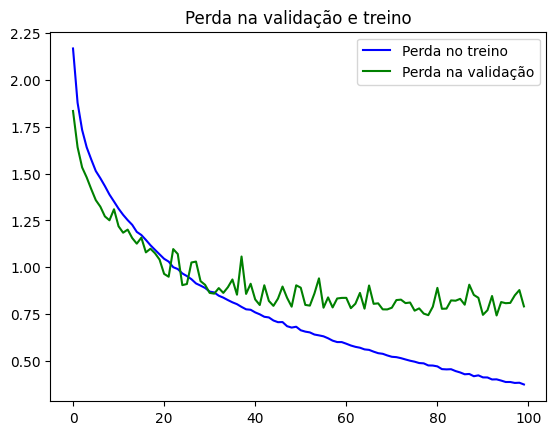

In [10]:
 # learning curves
summarize_diagnostics(history)

In [11]:
model_name = f'cifar-resnet50-baseline-holdout-{epochs}epochs_dropout_batch_augmentation.npy'
model.save(model_name)

INFO:tensorflow:Assets written to: cifar-resnet50-baseline-holdout-100epochs_dropout_batch_augmentation.npy\assets


INFO:tensorflow:Assets written to: cifar-resnet50-baseline-holdout-100epochs_dropout_batch_augmentation.npy\assets


In [12]:
# entry point, run the test harness
#run_test_harness(epochs=100, verb=1)